In [1]:
import string;
from gensim.models import doc2vec
import numpy as np
import nltk

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 30145621

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [2]:
docs = []
titles = []
locations = []
lines = ''
title = ''
location = ''

In [3]:
with open('unique.txt', 'r') as rf:
    for line in rf:
        if location == '':
            location = line[:-1]
            locations.append(location)
        if title == '':
            title = line[:-1]
            titles.append(title)
            location = ''
        if line == 'zzz\n':
            docs.append(lines)
            lines = ''
            title = ''
            location = ''
        else:
            lines = lines+line 

In [4]:
d, indices, counts = np.unique(docs, return_index=True, return_counts=True)
print(len(d))
print(len(titles))

14177
14177


In [108]:
"""write out unique jobs to new file"""
with open('U.txt', 'w') as wf:
    for i in indices:
        wf.write(docs[i])
        wf.write('zzz\n')

In [24]:
def tokenize_jobs(documents):
    """converts job listings to genism tagged documents"""
    tokens = []
    for i in range(len(documents)-1):
        tokenized = [x.lower() for x in nltk.word_tokenize(documents[i], language='english')]
        tokens.append(tokenized)
    return tokens
    

tokens = tokenize_jobs(d)
print(len(tokens))

14176


In [38]:
def create_tagged_objects(tokens):
    """Convers tokens to genism tagged documents"""
    tagged_docs = []
    for i in range(len(tokens) - 1):
        tagged_doc = doc2vec.TaggedDocument(words=tokens[i], tags=[i])
        tagged_docs.append(tagged_doc)
    return tagged_docs


tagged_docs = create_tagged_objects(tokens)    

In [145]:
import random

model = doc2vec.Doc2Vec(alpha=0.05, min_alpha=0.05, vector_size=100, window=8, min_count=5, workers=4)


print('Building vocab')
model.build_vocab(tagged_docs)
print('Vocab length: ' + str(len(model.wv.vocab)))

len(model.docvecs)
epochs = 20
factor = 0.9
for epoch in range(epochs):
    # train epoch by epoch
    print('Training epoch %d' % epoch)
    random.shuffle(tagged_docs)
    model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha *= factor  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Building vocab
Vocab length: 23655
Training epoch 0
Training epoch 1
Training epoch 2
Training epoch 3
Training epoch 4
Training epoch 5
Training epoch 6
Training epoch 7
Training epoch 8
Training epoch 9
Training epoch 10
Training epoch 11
Training epoch 12
Training epoch 13
Training epoch 14
Training epoch 15
Training epoch 16
Training epoch 17
Training epoch 18
Training epoch 19


In [46]:
model.docvecs[1]

array([-0.6737089 , -0.97660583, -0.15252489,  0.70468867, -2.1560898 ,
       -0.5723263 ,  3.4865632 ,  1.0154489 ,  3.1887832 ,  1.4245416 ,
        0.3898841 ,  2.2268085 , -1.9803516 , -1.0917691 ,  0.7697824 ,
        1.8470757 ,  1.2235131 , -0.8030839 ,  1.421041  ,  1.5525411 ,
        1.117808  , -0.04822988,  1.0359918 , -1.5036613 ,  1.6036965 ,
        0.6129022 , -2.3317418 ,  3.5032973 ,  1.4852017 , -2.0683799 ,
       -1.4027038 , -1.4041681 , -1.9004871 ,  1.9917197 ,  1.9814638 ,
       -0.21640256, -0.18700883, -0.7711888 , -2.8229933 , -0.07496693,
        0.18056065,  0.43756518,  1.3950876 ,  0.0594182 , -0.569869  ,
       -2.084373  , -1.1753875 ,  1.1645427 , -1.3566558 , -2.2910738 ,
        4.6394134 ,  0.5251104 ,  1.4768277 , -1.5296654 , -0.44668978,
       -5.8846993 ,  0.5518802 , -0.7966353 , -0.6221503 ,  1.0271081 ,
       -1.3870442 , -2.070831  , -3.2801225 ,  0.5667431 ,  0.61824185,
       -0.9259353 ,  0.29290083, -0.57024   ,  1.2596213 ,  1.07

In [146]:
for n in range(10):
    print("\nThe job is: ", titles[1000*n])
    print("\nTop 5 results:")
    for i in range(5):
        print(" ", i+1, titles[model.docvecs.most_similar(1000*n)[i][0]])



The job is:  "Make It Toxic-Free" Advocate

Top 5 results:
  1 21st Century Transportation Advocate
  2 Clean Water Advocate
  3 Youth Justice Policy Senior Associate
  4 Senior Program Officer, Program Advocacy and Communications, Global Health Research & Development
  5 SCL/GDI- Program Coordinator for the Support of Women´s Leadership and Representation (PROLID)- Defined Term Contractual-(DTC)

The job is:  Administrative Coordinator

Top 5 results:
  1 Administrative Assistant, CMO
  2 Administrative Assistant
  3 Executive Assistant
  4 Executive Assistant
  5 Office Admin Assistant

The job is:  Brand Specialist - Consumer Electronics

Top 5 results:
  1 Brand Specialist - Canada Hardlines
  2 Brand Specialist - Canada Consumables
  3 Brand Specialist - Canada Hardlines
  4 Brand Specialist, Grocery
  5 Vendor Manager

The job is:  Contact Representative (Customer Service Representative)

Top 5 results:
  1 Contact Representative (Customer Service Representative)
  2 Contact Rep

In [135]:
model.wv.most_similar('python')

[('java', 0.5541857481002808),
 ('c++', 0.49893319606781006),
 ('stata', 0.4979228377342224),
 ('cuda', 0.4821644425392151),
 ('opengl', 0.47420257329940796),
 ('elasticsearch', 0.4682334065437317),
 ('bash', 0.46654659509658813),
 ('angular', 0.455361932516098),
 ('spss', 0.4511607885360718),
 ('vba', 0.4499659538269043)]

In [136]:
model.wv.most_similar('software')

[('wfn', 0.4261420667171478),
 ('professional', 0.42529863119125366),
 ('windows-based', 0.4168233871459961),
 ('parts', 0.4150545299053192),
 ('windows', 0.41477102041244507),
 ('java', 0.411377489566803),
 ('rtos', 0.40638649463653564),
 ('softwares', 0.4056606888771057),
 ('technologies', 0.40438976883888245),
 ('abap', 0.39883822202682495)]

In [137]:
model.wv.most_similar('communication')

[('communications', 0.7982944846153259),
 ('communicator', 0.4136987626552582),
 ('hand-eye', 0.4014595150947571),
 ('reading/writing', 0.3653428852558136),
 ('storm', 0.36144858598709106),
 ('time-management', 0.3601517379283905),
 ('sudden', 0.357890248298645),
 ('hd', 0.35413333773612976),
 ('91st', 0.34989476203918457),
 ('cutter', 0.3483879566192627)]

In [53]:
model.wv.most_similar('medical')

[('pediatric', 0.4776403605937958),
 ('veterinary', 0.4713077247142792),
 ('kavo', 0.4451991319656372),
 ('medical/clinical', 0.4440969228744507),
 ('nonesuch', 0.44075244665145874),
 ('health', 0.42909711599349976),
 ('call', 0.4188845157623291),
 ('chiropractic', 0.414539098739624),
 ('gorton', 0.4131050705909729),
 ('medical/dental', 0.4122602045536041)]

In [54]:
vectors = []
for i in range(len(model.docvecs)-1):
    vectors.append(model.docvecs[i])

In [55]:
docs_proj = TSNE(random_state=RS).fit_transform(vectors)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x11595e518>)

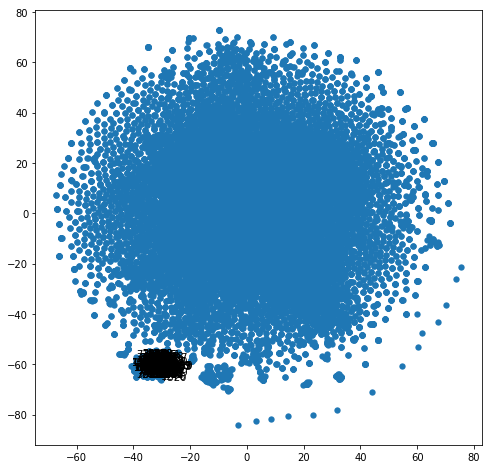

In [143]:
clump = []
def scatter(x):
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    for i in range(len(vectors)-1):
        if x[i][0] < -30 and x[i][0] > -42 and x[i][1] < -55: 
            ax.annotate(i, (x[i]))
            clump.append(i)
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')
    
    return f, ax, sc

scatter(docs_proj)

In [144]:
for i, index in enumerate(clump):
    print(titles[index])
    print(index)

ADMINISTRATIVE OFFICER
162
ADMINISTRATIVE OFFICER
163
ADMINISTRATIVE SUPPORT ASSISTANT
168
ASSISTANT ADMINISTRATOR, EXTERNAL AFFAIRS/CHIEF OF STAFF
203
Administrative Assistant
768
Administrative Assistant (Office Automation), GS-0303-07 (NTE 6 months)
807
Administrative Assistant, Bureau for Federal Chaplaincy Ministries
926
Administrative Officer
1037
Administrative Officer
1038
Administrative Officer
1040
Administrative Officer, GS-0341-13 (DEU-YBD)
1041
Administrative Support Assistant (Investigations/OA)
1089
Administrative Support Assistant (Investigations/OA)
1090
Administrative Support Assistant (OA)
1091
Air Traffic Control Specialist
1174
Air Traffic Control Specialist (Traffic Management Coordinator)
1175
Airway Transportation Systems Specialist
1194
Animal Keeper (American Trail)
1272
Animal Keeper (American Trail)
1273
Animal Keeper (Primates)
1274
Animal Keeper (Primates)
1275
Animal Keeper - Primates
1276
Appraiser
1332
Appraiser
1333
Assistant General Counsel, EM-0905
1